# University of Aberdeen

## Applied AI (CS5079)

### Resit CA1 - Reinforcement Learning with OpenAI Gym

In [1]:
#Library for environments
import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map

#Librairies to represent the output
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

#Essential libraries for computation
import numpy as np
import random
from setuptools import dist
import tensorflow.compat.v1 as tf
from collections import deque

We will use the following environment.

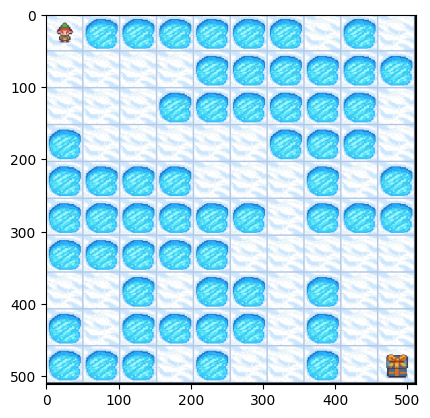

In [2]:
from IPython.display import display
random_map = generate_random_map(size=10, p=0.3)    
env = gym.make("FrozenLake-v1", desc=random_map, render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
display(plt.gcf())
clear_output(wait=True)

In [3]:
random_map

['SHHHHHHFHF',
 'FFFFHHHHHH',
 'FFFHHHHHHF',
 'HFFFFFHHHF',
 'HHHHFFFHFH',
 'HHHHHHFHHH',
 'HHHHHFFFFF',
 'FFHFHHFHFF',
 'HFHHHHFHFF',
 'HHHFHFFHFG']

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Huber, MeanSquaredError

In [180]:
%matplotlib inline
class QLearningAgent:
    def __init__(self, env, epsilon=1, learning_rate=0.001, discount_factor=0.95,\
                  max_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.0001):
        self.env = env
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.space_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.max_epsilon = max_epsilon            # Exploration probability at start
        self.min_epsilon = min_epsilon          # Minimum exploration probability
        self.epsilon_decay = epsilon_decay      # Exponential decay rate for exploration prob
        self.Q_table = np.zeros((self.space_size, self.action_size))
        self.rewards = []
        self.avg_rewards = []
        self.flattened_map = env.desc.flatten()
        self.successful_actions = []
        self.env.observation_space = tf.keras.utils.to_categorical(np.arange(env.observation_space.n), num_classes=env.observation_space.n)

        # ------------------------------------------------------------------------------------------------------
        # Open for interpretation
        self.model = Sequential([
            Dense(64, activation='relu', input_dim=self.space_size),
            Dense(64, activation='relu'),
            Dense(self.action_size, activation='linear')])
        self.model.compile(optimizer='Adam', loss=MeanSquaredError())
        # ------------------------------------------------------------------------------------------------------

    def train(self, episodes=100):
        for i, episode in enumerate(range(episodes)):
            state = self.env.reset()[0]
            done = False
            truncated = False
            score = 0
            actions = []
            # print('Episode:', i)
            steps = 0
            while not done and not truncated:
                # Take a random value between the range of 0-1, if it is less than our exploration rate probability then we take a random action
                trade_off = random.uniform(0, 1)
                if trade_off < self.epsilon:
                    action = self.env.action_space.sample()
                else:
                    # Selects action with the highest Q-value for the current state
                    action = np.argmax(self.Q_table[state])
                # action = np.argmax(self.Q_table[state])

                next_state, reward, done, truncated, info = self.env.step(action)
                # print(action)
                # print(next_state, reward, done, info, self.flattened_map[next_state])

                if next_state == state and not done:
                    reward = -5
                if self.flattened_map[next_state] == b'H':
                    reward = -10
                if self.flattened_map[next_state] == b'G':
                    reward = 100
                if self.flattened_map[next_state] == b'F':
                    reward = -1
                # print(next_state, reward, done, info, self.flattened_map[next_state])
                # Q(s,a)=(1−α)⋅Q(s,a)+α⋅(R+γ⋅maxa'Q(s',a'))
                self.Q_table[state, action] = self.Q_table[state, action] + self.learning_rate * (reward + self.discount_factor * np.max(self.Q_table[next_state, :]) - self.Q_table[state, action])

                score += reward
                state = next_state
                steps += 1

                actions.append(action)
                if self.flattened_map[next_state] == b'G':
                    self.successful_actions.append((actions, score))

            # plt.imshow(self.env.render())
            # display(plt.gcf())
            # clear_output(wait=True)
                    # complete = True
                    # print(f"Episode {episode + 1} Score {score}")
            # self.learning_rate = self.min_learning_rate + (self.max_learning_rate - self.min_learning_rate)*np.exp(-self.learning_rate_decay*episode)
            self.epsilon = self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.epsilon_decay*episode)
            self.rewards.append(score)
            self.avg_rewards.append(score/steps)

            # last_10_avg = np.mean(self.avg_rewards[-10:])
            # print('last 10 avg reward:', last_10_avg)
            # if i > 100 and abs(score/steps - last_10_avg) < 0.001: # early stopping
            #     print('break diff', score/steps - last_10_avg)
            #     break
            # if i % 10000 == 0:
            # print(f"Episode {episode + 1} Score {score} Learning Rate {self.learning_rate} Exploration Probability {self.epsilon}")
            # print(self.learning_rate, self.epsilon)
    def greedy_render(self):
        solved = False
        while not solved:
            state = self.env.reset()[0]
            truncated = False
            done = False
            actions = []
            # print('Episode:', i)
            while not done and not truncated:

                action = np.argmax(self.Q_table[state])
                next_state, reward, done, truncated, info = self.env.step(action)
                plt.imshow(self.env.render())
                display(plt.gcf())
                clear_output(wait=True)

            if self.flattened_map[next_state] == b'G':
                solved = True

            # plt.imshow(self.env.render())
            # display(plt.gcf())
            # clear_output(wait=True)


c:\Users\kuba\OneDrive\Pulpit\studia\year 5\applied ai\assessment1\CS5079_AppliedAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


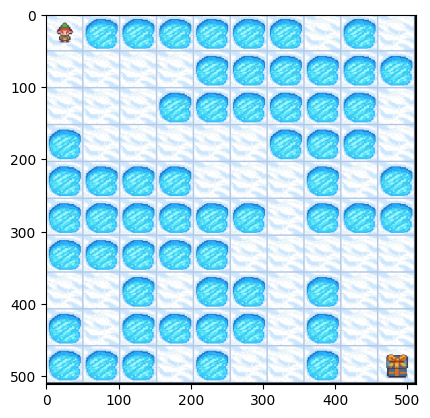

c:\Users\kuba\OneDrive\Pulpit\studia\year 5\applied ai\assessment1\CS5079_AppliedAI\.venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[-1.57490159e+01 -1.32363626e+01 -1.33450996e+01 -1.50039882e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.19796406e+01 -1.15643230e+01 -1.17501307e+01 -1.19598705e+01]
 [-1.11551194e+01 -1.15070950e+01 -1.08505121e+01 -1.10135406e+01]
 [-1.08241239e+01 -1.09893800e+01 -1.05460139e+01 -1.06021894e+01]
 [-1.03307005e+01 -1.03371451e+01 -1.00000000e+01 -1.03358849e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

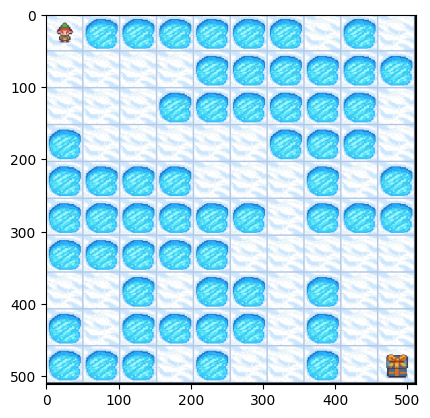

In [181]:
# random_map = generate_random_map(size =10, p=0.3)    

env = gym.make("FrozenLake-v1", desc=random_map, render_mode="rgb_array", is_slippery=True)
env.reset()
agent = QLearningAgent(env)
plt.imshow(env.render())
display(plt.gcf())
# Train the agent
agent.train(episodes=10_000_000)
print(agent.Q_table)


# Close the environment
env.close()


In [183]:
len(agent.successful_actions)

10

In [182]:
sorted(agent.successful_actions, key=lambda x: x[1], reverse=True)[0]

([1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 0, 1, 1, 1, 3, 1, 1, 2, 3, 1], 79)

KeyboardInterrupt: 

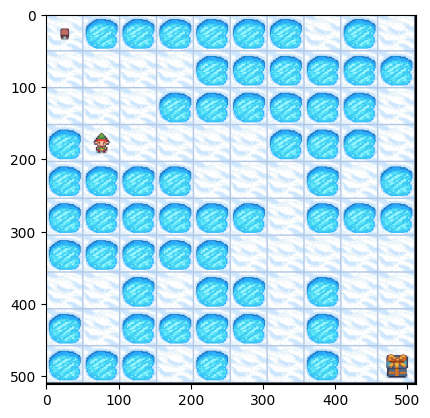

In [184]:
agent.greedy_render()

In [175]:
env.reset()
print(sorted(agent.successful_actions, key=lambda x: x[1], reverse=True)[0][0])
for action in sorted(agent.successful_actions, key=lambda x: x[1], reverse=True)[0][0]:
    print(action)
    env.step(action)
    plt.imshow(env.render())
    display(plt.gcf())
    clear_output(wait=True)
    # time.sleep(0.6)

Error in callback <function flush_figures at 0x000001E860FF5300> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [159]:
max(agent.rewards)

83

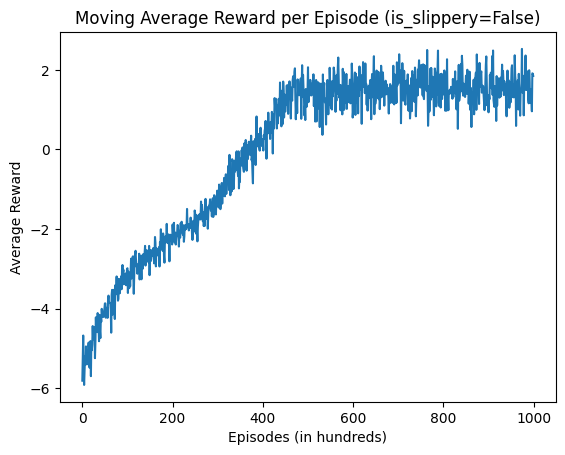

In [171]:
# plt.plot(agent.avg_rewards)
# plt.xlabel('Episodes')
# plt.ylabel('Average Reward')
# plt.title('Average Reward per Episode')
# plt.show()
window_size = 100
moving_avg_rewards = [np.mean(agent.avg_rewards[i:i+window_size]) for i in range(0, len(agent.avg_rewards), window_size)]

plt.plot(moving_avg_rewards)
plt.xlabel('Episodes (in hundreds)')
plt.ylabel('Average Reward')
plt.title('Moving Average Reward per Episode (is_slippery=False)')
plt.show()

In [ ]:
%matplotlib inline
class QLearningAgentDistance:
    def __init__(self, env, exploration_probability=1, learning_rate=0.1, discount_factor=0.95,\
                  max_epsilon=1.0, min_epsilon=0.1, decay_rate=0.0001, \
                    max_learning_rate=0.9, min_learning_rate=0.1, decay_learning_rate=0.0001):
        self.env = env
        self.exploration_probability = exploration_probability
        self.learning_rate = learning_rate
        self.max_learning_rate = max_learning_rate
        self.min_learning_rate = min_learning_rate
        self.decay_learning_rate = decay_learning_rate
        self.discount_factor = discount_factor
        self.space_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.max_epsilon = max_epsilon            # Exploration probability at start
        self.min_epsilon = min_epsilon          # Minimum exploration probability
        self.decay_rate = decay_rate      # Exponential decay rate for exploration prob
        self.Q_table = np.zeros((self.space_size, self.action_size))
        self.rewards = []
        self.avg_rewards = []
        self.flattened_map = env.desc.flatten()
        self.successful_actions = []
        self.goal_position = np.array(np.where(env.desc == b'G')).flatten()
        self.position = np.array(np.where(env.desc == b'S')).flatten()
        self.max_distance = np.abs(self.position - self.goal_position).sum()
        self.env.observation_space = tf.keras.utils.to_categorical(np.arange(env.observation_space.n), num_classes=env.observation_space.n)

        # ------------------------------------------------------------------------------------------------------
        # Open for interpretation
        self.model = Sequential([
            Dense(64, activation='relu', input_dim=self.space_size),
            Dense(64, activation='relu'),
            Dense(self.action_size, activation='linear')])
        self.model.compile(optimizer='Adam', loss=MeanSquaredError())
        # ------------------------------------------------------------------------------------------------------

    def train(self, episodes=100):
        print(self.goal_position)
        for i, episode in enumerate(range(episodes)):
            state = self.env.reset()[0]
            done = False
            truncated = False
            score = 0
            actions = []
            # print('Episode:', i)
            steps = 0
            while not done and not truncated:
                # print('self.position:', self.position)      
                # Take a random value between the range of 0-1, if it is less than our exploration rate probability then we take a random action
                trade_off = random.uniform(0, 1)
                if trade_off < self.exploration_probability:
                    action = self.env.action_space.sample()
                else:
                    # Selects action with the highest Q-value for the current state
                    action = np.argmax(self.Q_table[state])
                # action = np.argmax(self.Q_table[state])

                next_state, reward, done, truncated, info = self.env.step(action)
                # print(action)
                # print(next_state, reward, done, info, self.flattened_map[next_state])
                self.position = np.array([next_state // 10, next_state % 10])
                
                manhattan_distance = np.abs(self.position - self.goal_position).sum()
                dist_reward = manhattan_distance / self.max_distance

                if next_state == state and not done:
                    reward = -25
                if self.flattened_map[next_state] == b'H':
                    reward = -100
                if self.flattened_map[next_state] == b'G':
                    reward = 100
                if self.flattened_map[next_state] == b'F':
                    reward = -1
                    
                if reward < 0:
                    reward *= dist_reward
                # print(next_state, reward, done, info, self.flattened_map[next_state])
                # Q(s,a)=(1−α)⋅Q(s,a)+α⋅(R+γ⋅maxa'Q(s',a'))
                self.Q_table[state, action] = self.Q_table[state, action] + self.learning_rate * (reward + self.discount_factor * np.max(self.Q_table[next_state, :]) - self.Q_table[state, action])

                score += reward
                state = next_state

                # print('manhattan_distance:', manhattan_distance)
                steps += 1

                actions.append(action)
                if self.flattened_map[next_state] == b'G':
                    self.successful_actions.append((actions, score))
            # plt.imshow(self.env.render())
            # display(plt.gcf())
            # clear_output(wait=True)
                    # complete = True
                    # print(f"Episode {episode + 1} Score {score}")
            self.learning_rate = self.min_learning_rate + (self.max_learning_rate - self.min_learning_rate)*np.exp(-self.decay_learning_rate*episode)
            self.exploration_probability = self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*episode)
            self.rewards.append(score)
            self.avg_rewards.append(score/steps)

    def greedy_render(self):
        solved = False
        while not solved:
            state = self.env.reset()[0]
            truncated = False
            done = False
            actions = []
            # print('Episode:', i)
            while not done and not truncated:

                action = np.argmax(self.Q_table[state])
                next_state, reward, done, truncated, info = self.env.step(action)
                plt.imshow(self.env.render())
                display(plt.gcf())
                clear_output(wait=True)

            if self.flattened_map[next_state] == b'G':
                solved = True
            # if i % 10000 == 0:
            # print(f"Episode {episode + 1} Score {score} Learning Rate {self.learning_rate} Exploration Probability {self.exploration_probability}")
            # print(self.learning_rate, self.exploration_probability)


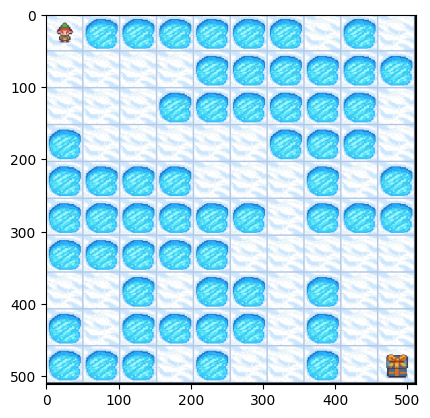

[9 9]
[[-3.75291215e+01 -5.64379559e+01 -5.41501652e+01 -6.12021877e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.58403885e+01 -3.46736045e+01 -3.63445613e+01 -3.67332490e+01]
 [-5.38954073e+01 -3.69655351e+01 -5.80244859e+01 -5.70802426e+01]
 [-5.38948444e+01 -4.63796115e+01 -6.09112860e+01 -5.59252229e+01]
 [-6.81039653e+01 -6.48281293e+01 -7.56868154e+01 -6.75151085e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000

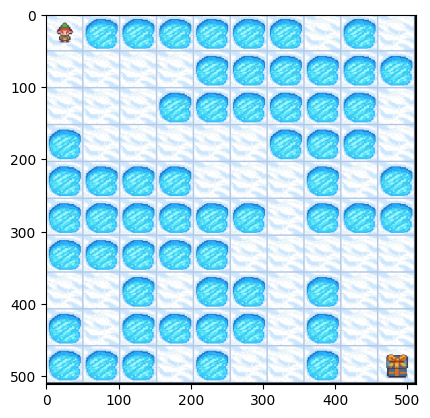

In [205]:
env = gym.make("FrozenLake-v1", desc=random_map, render_mode="rgb_array", is_slippery=True)
env.reset()
agent = QLearningAgentDistance(env)
plt.imshow(env.render())
display(plt.gcf())
# Train the agent
agent.train(episodes=500_000)
print(agent.Q_table)


# Close the environment
env.close()

In [206]:
len(agent.successful_actions)

40

KeyboardInterrupt: 

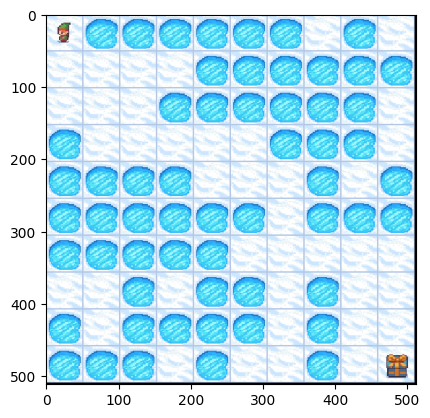

In [208]:
agent.greedy_render()

In [207]:
sorted(agent.successful_actions, key=lambda x: x[1], reverse=True)[0]

([2, 0, 3, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2], 91.0)

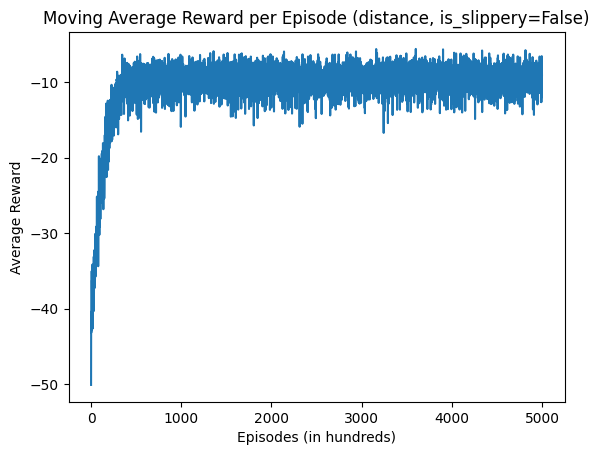

In [203]:
# plt.plot(agent.avg_rewards)
# plt.xlabel('Episodes')
# plt.ylabel('Average Reward')
# plt.title('Average Reward per Episode')
# plt.show()
window_size = 100
moving_avg_rewards = [np.mean(agent.avg_rewards[i:i+window_size]) for i in range(0, len(agent.avg_rewards), window_size)]

plt.plot(moving_avg_rewards)
plt.xlabel('Episodes (in hundreds)')
plt.ylabel('Average Reward')
plt.title('Moving Average Reward per Episode (distance, is_slippery=False)')
plt.show()